# Fireforest Dataset

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
FF=pd.read_csv('forestfires.csv')
FF

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
FF = FF.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
X=FF.iloc[:,:-1]
Y=FF['size_category'].values.ravel()

In [6]:
model = Sequential()
model.add(Dense(12, input_dim=30,  activation='relu')) 
model.add(Dense(8,  activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [9]:
FF.shape

(517, 31)

In [10]:
nn = model.fit(X, Y, validation_split=0.2, epochs=250, batch_size=10)

Epoch 1/250
42/42 [==============================] - 1s 7ms/step - loss: 37.9361 - accuracy: 0.7385 - val_loss: 30.3283 - val_accuracy: 0.7019
Epoch 2/250
42/42 [==============================] - 0s 3ms/step - loss: 19.2516 - accuracy: 0.7385 - val_loss: 14.7286 - val_accuracy: 0.7019
Epoch 3/250
42/42 [==============================] - 0s 3ms/step - loss: 6.6703 - accuracy: 0.7361 - val_loss: 1.8422 - val_accuracy: 0.6923
Epoch 4/250
42/42 [==============================] - 0s 3ms/step - loss: 1.0668 - accuracy: 0.6780 - val_loss: 1.4798 - val_accuracy: 0.7212
Epoch 5/250
42/42 [==============================] - 0s 3ms/step - loss: 0.8360 - accuracy: 0.7603 - val_loss: 1.2834 - val_accuracy: 0.7692
Epoch 6/250
42/42 [==============================] - 0s 3ms/step - loss: 0.7678 - accuracy: 0.7772 - val_loss: 1.0653 - val_accuracy: 0.7212
Epoch 7/250
42/42 [==============================] - 0s 3ms/step - loss: 0.7362 - accuracy: 0.7700 - val_loss: 0.9252 - val_accuracy: 0.7212
Epoch 8/2

In [11]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0323 - accuracy: 0.9884
accuracy: 98.84%


In [12]:
nn.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

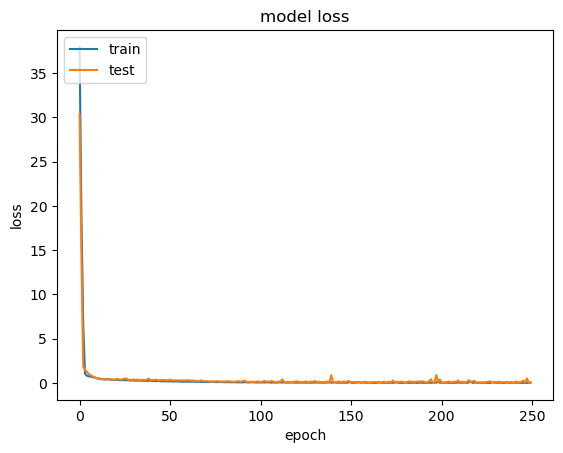

In [13]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'])
plt.plot(nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Gas Turbine Dataset


In [14]:
GT=pd.read_csv('gas_turbines.csv')
GT

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [15]:
GT.describe(include='all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [16]:
GT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [17]:
GT['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [18]:
print("Mean of Turbine Energy Yield is: ", GT['TEY'].mean())
print("Median of Turbine Energy Yield is: ", GT['TEY'].median())

Mean of Turbine Energy Yield is:  134.18846399361655
Median of Turbine Energy Yield is:  133.78


In [19]:
tey = []
for i in GT['TEY']:
    if i>=133.78:
        tey.append(1)
    else:
        tey.append(0)
GT['tey'] = tey

In [20]:
GT.drop('TEY', axis = 1, inplace = True)
GT.rename({'tey': 'TEY'},axis = 1, inplace = True)

In [21]:
GT['TEY'].value_counts()

1    7658
0    7381
Name: TEY, dtype: int64

In [22]:
x=GT.drop(columns=['TEY'])
y=GT['TEY']

In [23]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15034    0
15035    0
15036    0
15037    0
15038    0
Name: TEY, Length: 15039, dtype: int64

In [25]:
model1 = Sequential()
model1.add(Dense(20, input_dim=10,  activation='relu'))
model1.add(Dense(10,  activation='relu')) 
model1.add(Dense(10,  activation='relu')) 
model1.add(Dense(1, activation='sigmoid')) 

In [26]:
GT.shape

(15039, 11)

In [27]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)

In [29]:
NN = model1.fit(X_standardized, y, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
1204/1204 [==============================] - 3s 2ms/step - loss: 0.3289 - accuracy: 0.8293 - val_loss: 0.2610 - val_accuracy: 0.8737
Epoch 2/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.2257 - accuracy: 0.8914 - val_loss: 0.2316 - val_accuracy: 0.8836
Epoch 3/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.2114 - accuracy: 0.9016 - val_loss: 0.2675 - val_accuracy: 0.8893
Epoch 4/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.2040 - accuracy: 0.9025 - val_loss: 0.2738 - val_accuracy: 0.8770
Epoch 5/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.2002 - accuracy: 0.9063 - val_loss: 0.2555 - val_accuracy: 0.8833
Epoch 6/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.1972 - accuracy: 0.9083 - val_loss: 0.2212 - val_accuracy: 0.8966
Epoch 7/100
1204/1204 [==============================] - 2s 2ms/step - loss: 0.1931 - accuracy: 0.9092 - val_loss: 0.2377 - val_ac

In [30]:
scores = model1.evaluate(X_standardized, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: 0.1966 - accuracy: 0.9191
accuracy: 91.91%


In [31]:
NN.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

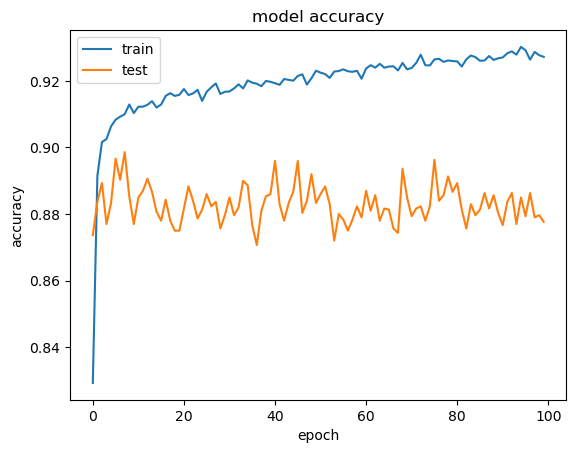

In [32]:

plt.plot(NN.history['accuracy'])
plt.plot(NN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()